In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from catboost import CatBoostClassifier

# Step 1: Read the CSV file
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/content/new_Base_CDM_balanced_V2.csv', sep=';')

# Step 2: Discretize continuous variables using K-Means clustering
continuous_features = ['X1', 'X2', 'X3', 'X4', 'X6']
for col in continuous_features:
    kmeans = KMeans(n_clusters=5, random_state=42)
    df[col + '_clustered'] = kmeans.fit_predict(df[[col]])

In [ ]:
df = df[['X1_clustered','X2_clustered','X3_clustered','X4_clustered','X6_clustered','X7','X5','Y']]

In [ ]:
df.head()

,X1_clustered,X2_clustered,X3_clustered,X4_clustered,X6_clustered,X7,X5,Y
0,0,0,0,0,0,No_Feat,CORA,No_Displ
1,0,0,0,2,0,No_Feat,LECLERC,No_Displ
2,0,0,0,0,0,No_Feat,AUCHAN,No_Displ
3,0,0,0,2,0,No_Feat,CARREFOUR,No_Displ
4,0,0,1,0,0,No_Feat,CORA,No_Displ


0:	learn: 0.6664940	total: 54.2ms	remaining: 5.36s
1:	learn: 0.6448058	total: 132ms	remaining: 6.47s
2:	learn: 0.6270719	total: 176ms	remaining: 5.7s
3:	learn: 0.6119868	total: 229ms	remaining: 5.5s
4:	learn: 0.5994994	total: 278ms	remaining: 5.29s
5:	learn: 0.5887212	total: 341ms	remaining: 5.35s
6:	learn: 0.5775367	total: 407ms	remaining: 5.41s
7:	learn: 0.5699081	total: 436ms	remaining: 5.01s
8:	learn: 0.5616892	total: 486ms	remaining: 4.92s
9:	learn: 0.5548061	total: 528ms	remaining: 4.75s
10:	learn: 0.5492495	total: 565ms	remaining: 4.57s
11:	learn: 0.5447368	total: 586ms	remaining: 4.3s
12:	learn: 0.5410394	total: 611ms	remaining: 4.09s
13:	learn: 0.5380532	total: 618ms	remaining: 3.79s
14:	learn: 0.5346745	total: 684ms	remaining: 3.88s
15:	learn: 0.5290264	total: 711ms	remaining: 3.73s
16:	learn: 0.5234897	total: 751ms	remaining: 3.67s
17:	learn: 0.5189110	total: 786ms	remaining: 3.58s
18:	learn: 0.5156684	total: 827ms	remaining: 3.53s
19:	learn: 0.5124248	total: 867ms	remaining

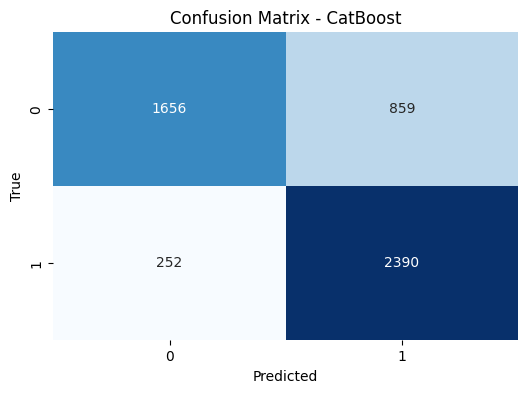

In [ ]:
# Step 2: Split the data into training and testing sets
X = df.drop(['Y'], axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Identify categorical features for CatBoost
cat_features = ['X7', 'X5']

# Step 4: Create and train the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, cat_features=cat_features)
catboost_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Step 6: Evaluate the performance
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost}')

# Step 7: Display the confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CatBoost')
plt.show()

**KBinsDiscretizer** et catboost

0:	learn: 0.6665552	total: 21.5ms	remaining: 2.13s
1:	learn: 0.6448261	total: 41.2ms	remaining: 2.02s
2:	learn: 0.6269829	total: 67.5ms	remaining: 2.18s
3:	learn: 0.6119972	total: 84.7ms	remaining: 2.03s
4:	learn: 0.6007756	total: 102ms	remaining: 1.94s
5:	learn: 0.5900511	total: 122ms	remaining: 1.91s
6:	learn: 0.5810472	total: 149ms	remaining: 1.98s
7:	learn: 0.5734561	total: 181ms	remaining: 2.08s
8:	learn: 0.5669030	total: 195ms	remaining: 1.98s
9:	learn: 0.5614525	total: 209ms	remaining: 1.88s
10:	learn: 0.5568028	total: 223ms	remaining: 1.8s
11:	learn: 0.5527843	total: 244ms	remaining: 1.79s
12:	learn: 0.5462555	total: 262ms	remaining: 1.76s
13:	learn: 0.5409342	total: 278ms	remaining: 1.71s
14:	learn: 0.5369169	total: 293ms	remaining: 1.66s
15:	learn: 0.5330708	total: 309ms	remaining: 1.62s
16:	learn: 0.5303122	total: 321ms	remaining: 1.57s
17:	learn: 0.5273387	total: 334ms	remaining: 1.52s
18:	learn: 0.5250834	total: 347ms	remaining: 1.48s
19:	learn: 0.5234943	total: 358ms	rema

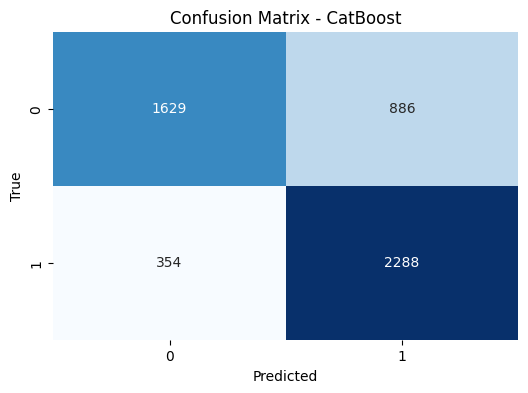

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from catboost import CatBoostClassifier

# Step 1: Read the CSV file
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/content/new_Base_CDM_balanced_V2.csv', sep=';')

# Step 2: Discretize continuous variables using KBinsDiscretizer
continuous_features = ['X1', 'X2', 'X3', 'X4', 'X6']
n_bins = 5  # Adjust the number of bins as needed
strategy = 'uniform'  # Choose a strategy ('uniform', 'quantile', 'kmeans')
encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

for col in continuous_features:
    df[col + '_clustered'] = encoder.fit_transform(df[[col]])

df = df[['X1_clustered', 'X2_clustered', 'X3_clustered', 'X4_clustered', 'X6_clustered', 'X7', 'X5', 'Y']]

# Step 3: Split the data into training and testing sets
X = df.drop(['Y'], axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Identify categorical features for CatBoost
cat_features = ['X7', 'X5']

# Step 5: Create and train the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, cat_features=cat_features)
catboost_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Step 7: Evaluate the performance
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost}')

# Step 8: Display the confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CatBoost')
plt.show()


In [ ]:
df.head()

,X1_clustered,X2_clustered,X3_clustered,X4_clustered,X6_clustered,X7,X5,Y
0,0.0,0.0,0.0,0.0,0.0,No_Feat,CORA,No_Displ
1,0.0,0.0,1.0,0.0,0.0,No_Feat,LECLERC,No_Displ
2,0.0,0.0,1.0,1.0,0.0,No_Feat,AUCHAN,No_Displ
3,0.0,0.0,1.0,0.0,0.0,No_Feat,CARREFOUR,No_Displ
4,0.0,0.0,2.0,1.0,0.0,No_Feat,CORA,No_Displ


random forest et KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Random Forest Accuracy: 0.7676943959666472


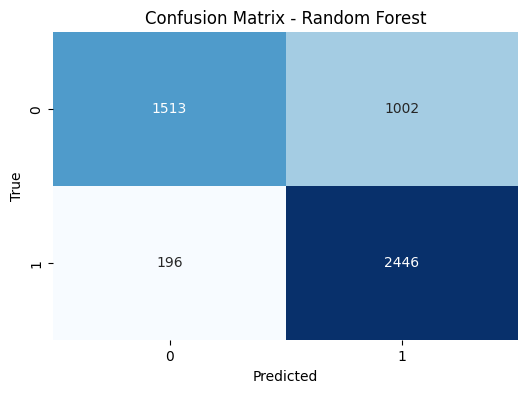

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Step 1: Read the CSV file
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/content/new_Base_CDM_balanced_V2.csv', sep=';')

# Step 2: Discretize continuous variables using K-Means clustering
continuous_features = ['X1', 'X2', 'X3', 'X4', 'X6']
for col in continuous_features:
    kmeans = KMeans(n_clusters=5, random_state=42)
    df[col + '_clustered'] = kmeans.fit_predict(df[[col]])

df = df[['X1_clustered', 'X2_clustered', 'X3_clustered', 'X4_clustered', 'X6_clustered', 'X7', 'X5', 'Y']]

# Step 3: One-hot encode categorical variables
df = pd.get_dummies(df, columns=['X7', 'X5'], drop_first=True)

# Step 4: Split the data into training and testing sets
X = df.drop(['Y'], axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 7: Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Step 8: Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()